## Table of Contents
- [TO DO](#to-do)
- [Introduction](#introduction)
- [Exploratory Data Analysis](#exploratory-data-analysis)
- [Correlation Heatmap](#correlation-heatmap)
- [Translate Attempts](#translate-attempts)
- [Data Preprocessing](#data-preprocessing)
- [Modeling](#modeling)
- [Scratchpad??](#scratchpad??)
- [Decision Tree](#decision-tree)
- [Pipeline](#pipeline)
- [Conclusion](#conclusion)

## TO DO {#to-do}
### ML pipeline, PCA, hyperparameter tuning, grid search, gradient boost, cross-validation, neural networks
### Not doing: Clustering
### Stretch goals: get translation working. integrate with ifixit datasets and/or API

## Introduction {#introduction}

Repairability of Consumer Electronics

Andrew Chau
kuzals@gmail.com
Summer 2023
BrainStation Toronto Data Science

This capstone project explores the success rate of repairing consumer electronics using various statistical modeling methods.


## Exploratory Data Analysis {#exploratory-data-analysis}

importing the required libraries for data manipulation (Pandas and NumPy) and visualization (MatPlotLib and Seaborn)

In [1]:
#pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

loading the dataset into a pandas dataframe using pd.read_csv()

In [2]:
df = pd.read_csv('Data/OpenRepairData_v0.3_aggregate_202303.csv')

df.info() provides an overview of the shape (103076 rows x 14 columns), names and data types of the columns, the size on disk (11MB+) of the dataset, and how complete each column in. Immediately we can see that "year_of_manufacture" and "product_age" are missing roughly 65,000 entries, and "problem" is missing about 15,000 entries. "repair_barrier_if_end_of_life" is only used for cases where an item cannot be fixed, so even though there are only 7268 entries, that number isn't out of the total 103076.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103076 entries, 0 to 103075
Data columns (total 14 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   id                             103076 non-null  object 
 1   data_provider                  103076 non-null  object 
 2   country                        103076 non-null  object 
 3   partner_product_category       103076 non-null  object 
 4   product_category               103076 non-null  object 
 5   product_category_id            103076 non-null  int64  
 6   brand                          103067 non-null  object 
 7   year_of_manufacture            37117 non-null   float64
 8   product_age                    37117 non-null   float64
 9   repair_status                  103076 non-null  object 
 10  repair_barrier_if_end_of_life  7268 non-null    object 
 11  group_identifier               103076 non-null  object 
 12  event_date                    

quick look at the first few rows of the dataset using .head()

In [5]:
df.head(8)

,id,data_provider,country,partner_product_category,product_category,product_category_id,brand,year_of_manufacture,product_age,repair_status,repair_barrier_if_end_of_life,group_identifier,event_date,problem
0,anstiftung_11539,anstiftung,DEU,Haushaltsgeräte ~ Siebträgermaschine,Coffee maker,36,Krups,1998.0,25.0,End of life,Spare parts too expensive,2711,2023-03-29,Pumpe defekt
1,anstiftung_11540,anstiftung,DEU,Elektro divers ~ Bluetooth Musik Box,Hi-Fi integrated,12,JBL,2016.0,7.0,Repairable,NaN,2711,2023-03-29,Akku lädt nicht
2,anstiftung_11541,anstiftung,DEU,Unterhaltungselektronik ~ Lautsprecher(boxen),Hi-Fi separates,13,Trust,2013.0,10.0,Fixed,NaN,2711,2023-03-29,Ohne Funktion
3,anstiftung_11542,anstiftung,DEU,Computer ~ Laptop,Laptop,16,Toshiba,2015.0,8.0,End of life,NaN,2711,2023-03-29,Netzteilbuchse und Grafikkarte defekt
4,anstiftung_11543,anstiftung,DEU,Elektro divers ~ Aktenvernichter,Paper shredder,21,Genie,2018.0,5.0,End of life,NaN,2711,2023-03-29,Getriebeschaden
5,anstiftung_11544,anstiftung,DEU,Haushaltsgeräte ~ Wasserkocher,Kettle,14,Support Plus,2018.0,5.0,End of life,No way to open product,2711,2023-03-29,ohne Funktion
6,anstiftung_11545,anstiftung,DEU,Haushaltsgeräte ~ Handrührgerät,Food processor,37,Severin,2020.0,3.0,End of life,Spare parts too expensive,2711,2023-03-29,Läuft zu schnell
7,anstiftung_11546,anstiftung,DEU,Unterhaltungselektronik ~ Radio,Portable radio,23,Philips,1993.0,30.0,Repairable,NaN,2711,2023-03-29,Kasette spielt nicht


quick look some rows at random in the dataset using .sample()

In [6]:
df.sample(8)

,id,data_provider,country,partner_product_category,product_category,product_category_id,brand,year_of_manufacture,product_age,repair_status,repair_barrier_if_end_of_life,group_identifier,event_date,problem
34636,rcint_41038,Repair Café International,NLD,Household appliances electric ~ Vacuum cleaner,Vacuum,34,Aldi,2016.0,6.0,Fixed,NaN,0041,2022-06-04,schakelaar doet het niet schakelaar
9007,anstiftung_3270,anstiftung,DEU,Elektro divers ~ Netzteil,Battery/charger/adapter,2,Unknown,NaN,NaN,Fixed,NaN,5073,2019-07-25,Universal-Schaltnetzteil mit einstellbarer Aus...
7861,anstiftung_5773,anstiftung,DEU,Unterhaltungselektronik ~ Lautsprecher(boxen),Hi-Fi separates,13,Unknown,NaN,NaN,Repairable,NaN,2711,2020-01-14,Kabelbruch am Stecker
57607,restart_12657,The Restart Project,BEL,Coffee maker ~ expresso,Coffee maker,36,Unknown,NaN,NaN,Fixed,NaN,Repair Cafe Runkst,2019-04-13,"expressomachine, filter is niet open te krijge..."
47567,rcint_52778,Repair Café International,NLD,Household appliances electric ~ Sandwich maker,Small kitchen item,29,Tefal,NaN,NaN,End of life,NaN,0026,2018-05-11,Onbekend Stoppen slaan door
98833,rcwales_1243,Repair Cafe Wales,GBR,Electrical ~ vacuum cleaner,Vacuum,34,Dyson,NaN,NaN,Unknown,NaN,Caerphilly,2019-03-01,vacuum cleaner extraction tube dodgy
32599,rcint_43331,Repair Café International,NLD,Household appliances electric ~ Cool box,Small kitchen item,29,Unknown,2014.0,8.0,End of life,NaN,0192,2022-07-25,werkt niet op 220V zekering defect en electron...
20585,rcint_48038,Repair Café International,GBR,Clocks / alarm clocks ~ Clock,Watch/clock,35,Unknown,NaN,NaN,Fixed,NaN,0338,2022-01-08,Won't start Clock doesn't run Used experience


quick look at the last few rows of the dataset using .tail() <br>
good to compare and contrast with the first few rows

In [7]:
df.tail(8)

,id,data_provider,country,partner_product_category,product_category,product_category_id,brand,year_of_manufacture,product_age,repair_status,repair_barrier_if_end_of_life,group_identifier,event_date,problem
103068,rcwales_7496,Repair Cafe Wales,GBR,Electrical Item ~ Small home electrical,Small home electrical,28,Unknown,NaN,NaN,End of life,Item too worn out,Mold,2022-10-30,Malfunction.
103069,rcwales_7497,Repair Cafe Wales,GBR,Electrical Item ~ Sewing machine,Sewing machine,27,Bernina,NaN,NaN,Repairable,NaN,Mold,2022-10-30,It is stuck on buttonhole mode and is seized up.
103070,rcwales_7498,Repair Cafe Wales,GBR,Electrical Item ~ Sewing machine,Sewing machine,27,Jones,NaN,NaN,Repairable,NaN,Mold,2022-10-30,Unknown probably motor.
103071,rcwales_7499,Repair Cafe Wales,GBR,Electrical Item ~ Small home electrical,Small home electrical,28,Permaplug,NaN,NaN,Fixed,NaN,Mold,2022-10-30,Extension cable for PAT testing.
103072,rcwales_7500,Repair Cafe Wales,GBR,Electrical Item ~ Misc,Misc,18,Unknown,NaN,NaN,Repairable,NaN,Mold,2022-10-30,Broken mirror.
103073,rcwales_7501,Repair Cafe Wales,GBR,Electrical Item ~ Sewing machine,Sewing machine,27,Toyota,NaN,NaN,Fixed,NaN,Mold,2022-10-30,Cotton reel spindle needs replacing.
103074,rcwales_7502,Repair Cafe Wales,GBR,Electrical Item ~ Sewing machine,Sewing machine,27,Brother,NaN,NaN,Fixed,NaN,Mold,2022-10-30,Bobbin not working.
103075,rcwales_7503,Repair Cafe Wales,GBR,Electrical Item ~ Vacuum,Vacuum,34,Hoover,NaN,NaN,Fixed,NaN,Mold,2022-10-30,It doesn’t turn on.


In [8]:
df.describe()

,product_category_id,year_of_manufacture,product_age
count,103076.000000,37117.000000,37117.000000
mean,23.369417,2008.472452,12.056543
std,10.205812,14.654064,14.560084
min,1.000000,1019.000000,-1.000000
25%,15.000000,2005.000000,4.000000
50%,24.000000,2013.000000,7.000000
75%,33.000000,2017.000000,15.000000
max,40.000000,2023.000000,998.000000


A few things look out of place from these descriptive statistics: product_category_id is not really a numerical value and should be converted. As mentioned before, the column year_of_manufacture has roughly 37,000 entries but is missing 70,000 values. Product age is calculated from year_of_manufacture (exact same number of rows) and will have incorrect values as well.

In [ ]:
df.sort_values(by='year_of_manufacture', ascending=True).head(50)

,id,data_provider,country,partner_product_category,product_category,product_category_id,brand,year_of_manufacture,product_age,repair_status,repair_barrier_if_end_of_life,group_identifier,event_date,problem
23855,rcint_3615,Repair Café International,NLD,Household appliances electric ~ Food processor,Food processor,37,KitchenAid,1019.0,998.0,Repairable,NaN,0016,2017-12-02,Vastgelopen onderdelen bestellen?
13163,rcint_44808,Repair Café International,AUS,Household appliances electric ~ Paper shredder,Paper shredder,21,Unknown,1900.0,123.0,Fixed,NaN,0333,2023-01-21,Not working Not seated correctly Adjusted the ...
13155,rcint_44790,Repair Café International,AUS,Display and sound equipment ~ Amplifier,Hi-Fi separates,13,Unknown,1900.0,123.0,Repairable,NaN,0333,2023-01-21,Blown Yes Advice given
13154,rcint_44789,Repair Café International,AUS,Clocks / alarm clocks ~ Alarm clock radio,Portable radio,23,Unknown,1900.0,123.0,End of life,No way to open product,0333,2023-01-21,No sound No
13160,rcint_44795,Repair Café International,AUS,Household appliances electric ~ Electric penci...,Small home electrical,28,Unknown,1900.0,123.0,Fixed,NaN,0333,2023-01-21,Won't sharpen Foreign object inside Taken apar...
13158,rcint_44793,Repair Café International,AUS,Household appliances electric ~ Electric kettle,Kettle,14,Unknown,1900.0,123.0,End of life,NaN,0333,2023-01-21,Not working Element buggered
18504,rcint_46791,Repair Café International,FRA,Tools electric ~ Strimmer,Power tool,24,ECHO,1900.0,123.0,End of life,NaN,0156,2023-03-11,"Impossible à démarrer, problème de réglage des..."
18510,rcint_46799,Repair Café International,FRA,Household appliances electric ~ Stick mixer / ...,Food processor,37,Riviera & Bar,1900.0,123.0,End of life,Item too worn out,0293,2023-03-11,moteur bloqué
18621,rcint_46944,Repair Café International,FRA,Tools electric ~ Multimeter,Small home electrical,28,M8,1900.0,123.0,End of life,NaN,0532,2023-02-18,Plus d'affichage à l'écran. Nappe de l'écran à...
18802,rcint_47156,Repair Café International,FRA,Computer equipment / phones ~ Printer,Printer/scanner,25,Epson,1900.0,123.0,Repairable,NaN,0183,2023-01-28,Bourrage papier Tige plastique délogée Remett...


changing suspicious and outright incorrect "year_of_manufacture" and "product_age" values to NaN

In [3]:
#df = df.loc[df['product_age'] > 100, ['year_of_manufacture', 'product_age']] = 'Unknown'
# df['product_age'] = df.apply(lambda row: 'unknown' if row['product_age'] > 100 else row['product_age'], axis=1)
#df.loc[df['year_of_manufacture'] < 1920, 'year_of_manufacture'] = 'NaN'
#df['year_of_manufacture'] = np.where(df['year_of_manufacture'] < 1920, 'NaN', df['year_of_manufacture'])
#df['year_of_manufacture'].replace(1900.0, np.NaN)
#df['year_of_manufacture'] = df.year_of_manufacture.where(df.year_of_manufacture.between(0, 1919))
df.loc[df.year_of_manufacture.between(0.0, 1919.0), ['year_of_manufacture', 'product_age']] = np.nan

In [ ]:
df.sort_values(by='product_age', ascending=True).head(50)

,id,data_provider,country,partner_product_category,product_category,product_category_id,brand,year_of_manufacture,product_age,repair_status,repair_barrier_if_end_of_life,group_identifier,event_date,problem
6342,anstiftung_6237,anstiftung,DEU,Unterhaltungselektronik ~ CD-Player,Handheld entertainment device,10,Unknown,2021.0,-1.0,Unknown,NaN,2711,2020-10-21,Schaden auf der Platine
37383,rcint_29126,Repair Café International,NLD,Household appliances electric ~ Air fryer,Small kitchen item,29,Philips,2020.0,0.0,Fixed,NaN,0041,2020-02-01,kabelbreuk nieuw snoer
37126,rcint_24428,Repair Café International,NLD,Household appliances electric ~ Sewing machine,Sewing machine,27,Singer,2019.0,0.0,Fixed,NaN,0024,2019-11-02,Nieuwe naaimachine ; advies N.V.T. Uitleg gegeven
6872,anstiftung_6097,anstiftung,DEU,Unterhaltungselektronik ~ Lautsprecher(boxen),Hi-Fi separates,13,JBL,2020.0,0.0,Repairable,NaN,2711,2020-07-29,USB-Buchse kaputt
37496,rcint_34495,Repair Café International,NLD,Toys electric ~ Toy car,Toy,32,Unknown,2021.0,0.0,Fixed,NaN,0036,2021-06-01,doet niks los contact in de afstandsbediening ...
37127,rcint_24158,Repair Café International,NLD,Household appliances electric ~ Lamp / lighting,Lamp,15,Trio Leuchten,2019.0,0.0,Fixed,NaN,0016,2019-11-02,weerstand moet er in printplaat van dimmer def...
37497,rcint_51113,Repair Café International,NLD,Household appliances electric ~ Induction hob,Small kitchen item,29,SilverCrest,2022.0,0.0,End of life,Item too worn out,0412,2022-12-14,Werkt niet Is nat geworden Is nat geworden daa...
36184,rcint_3750,Repair Café International,NLD,Household appliances electric ~ Earphone,Headphones,11,Samsung,2017.0,0.0,End of life,NaN,0024,2017-12-02,snoertje is los
37128,rcint_24364,Repair Café International,NLD,Household appliances electric ~ Clipper / trimmer,Small home electrical,28,Surker,2019.0,0.0,End of life,NaN,0009,2019-11-02,werkt niet oplader werkt niet ?
37498,rcint_51114,Repair Café International,NLD,Household appliances electric ~ Foot warmer / ...,Small home electrical,28,Alpina,2022.0,0.0,Fixed,NaN,0192,2022-12-21,"slaat steeds af lastig te bedienen getest, uit..."


quick overview of the distribution of the numerical values using .describe()

In [12]:
df.describe()

,product_category_id,year_of_manufacture,product_age
count,103076.000000,37068.000000,37068.000000
mean,23.369417,2008.631326,11.896749
std,10.205812,13.229585,13.123295
min,1.000000,1920.000000,-1.000000
25%,15.000000,2006.000000,4.000000
50%,24.000000,2013.000000,7.000000
75%,33.000000,2017.000000,15.000000
max,40.000000,2023.000000,103.000000


correcting 'product_age' values that are negative using df.loc

In [4]:
df.loc[df['product_age'] < 0, 'product_age'] = 0

In [14]:
df.describe()

,product_category_id,year_of_manufacture,product_age
count,103076.000000,37068.000000,37068.000000
mean,23.369417,2008.631326,11.896776
std,10.205812,13.229585,13.123269
min,1.000000,1920.000000,0.000000
25%,15.000000,2006.000000,4.000000
50%,24.000000,2013.000000,7.000000
75%,33.000000,2017.000000,15.000000
max,40.000000,2023.000000,103.000000


In [5]:
dfc = df

In [ ]:
df['repair_status'].value_counts()

repair_status
Fixed          54295
End of life    24433
Repairable     20948
Unknown         3400
Name: count, dtype: int64

In [ ]:
df['product_category'].value_counts()

product_category
Vacuum                               7308
Lamp                                 6688
Hi-Fi separates                      6474
Laptop                               6472
Coffee maker                         6295
Power tool                           5521
Small kitchen item                   4987
Portable radio                       4668
Food processor                       4649
Small home electrical                3551
Watch/clock                          3406
Sewing machine                       3318
Mobile                               2792
TV and gaming-related accessories    2548
Toaster                              2392
Iron                                 2294
Printer/scanner                      2202
Large home electrical                2180
Kettle                               2167
Misc                                 2037
Toy                                  2016
Decorative or safety lights          1941
Hair & beauty item                   1881
Tablet           

In [18]:
df['brand'].nunique()

9060

In [19]:
df['brand'].unique()

array(['Krups', 'JBL', 'Trust', ..., 'Dihl', 'Solar light', 'Permaplug'],
      dtype=object)

In [20]:
df['country'].value_counts()

country
NLD    28318
GBR    27790
DEU    13475
BEL    13418
DNK     5163
FRA     4002
CAN     2415
ITA     1762
USA     1482
NOR     1156
ESP      776
AUS      631
ARG      617
SWE      543
NZL      307
JEY      230
AUT      181
HKG      178
ISR      166
IRL      157
TUN       98
CHE       95
ISL       91
ZAF       10
BEN        9
LUX        3
TWN        3
Name: count, dtype: int64

In [ ]:
pd.crosstab(df['country'], df['product_category'])

product_category,Aircon/dehumidifier,Battery/charger/adapter,Coffee maker,DSLR/video camera,Decorative or safety lights,Desktop computer,Digital compact camera,Fan,Flat screen,Food processor,...,Projector,Sewing machine,Small home electrical,Small kitchen item,TV and gaming-related accessories,Tablet,Toaster,Toy,Vacuum,Watch/clock
country,,,,,,,,,,,,,,,,,,,,,
ARG,3,21,8,1,13,0,2,32,2,84,...,8,2,7,22,30,13,9,34,11,5
AUS,1,10,20,1,16,3,3,7,0,46,...,1,18,44,28,10,1,32,26,36,37
AUT,0,3,24,2,2,0,0,1,1,11,...,0,13,3,12,8,1,2,3,13,6
BEL,67,195,1123,19,220,104,68,98,227,609,...,49,383,271,1150,271,112,319,184,1123,181
BEN,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
CAN,10,21,16,3,22,166,7,45,4,59,...,2,30,38,77,12,219,38,14,55,81
CHE,1,1,5,0,1,2,2,1,1,0,...,2,2,0,4,2,0,1,2,3,2
DEU,28,222,714,122,277,93,94,38,245,855,...,61,453,648,533,324,167,294,262,793,291
DNK,12,132,164,7,120,84,29,28,67,314,...,37,341,345,192,121,43,119,133,302,172


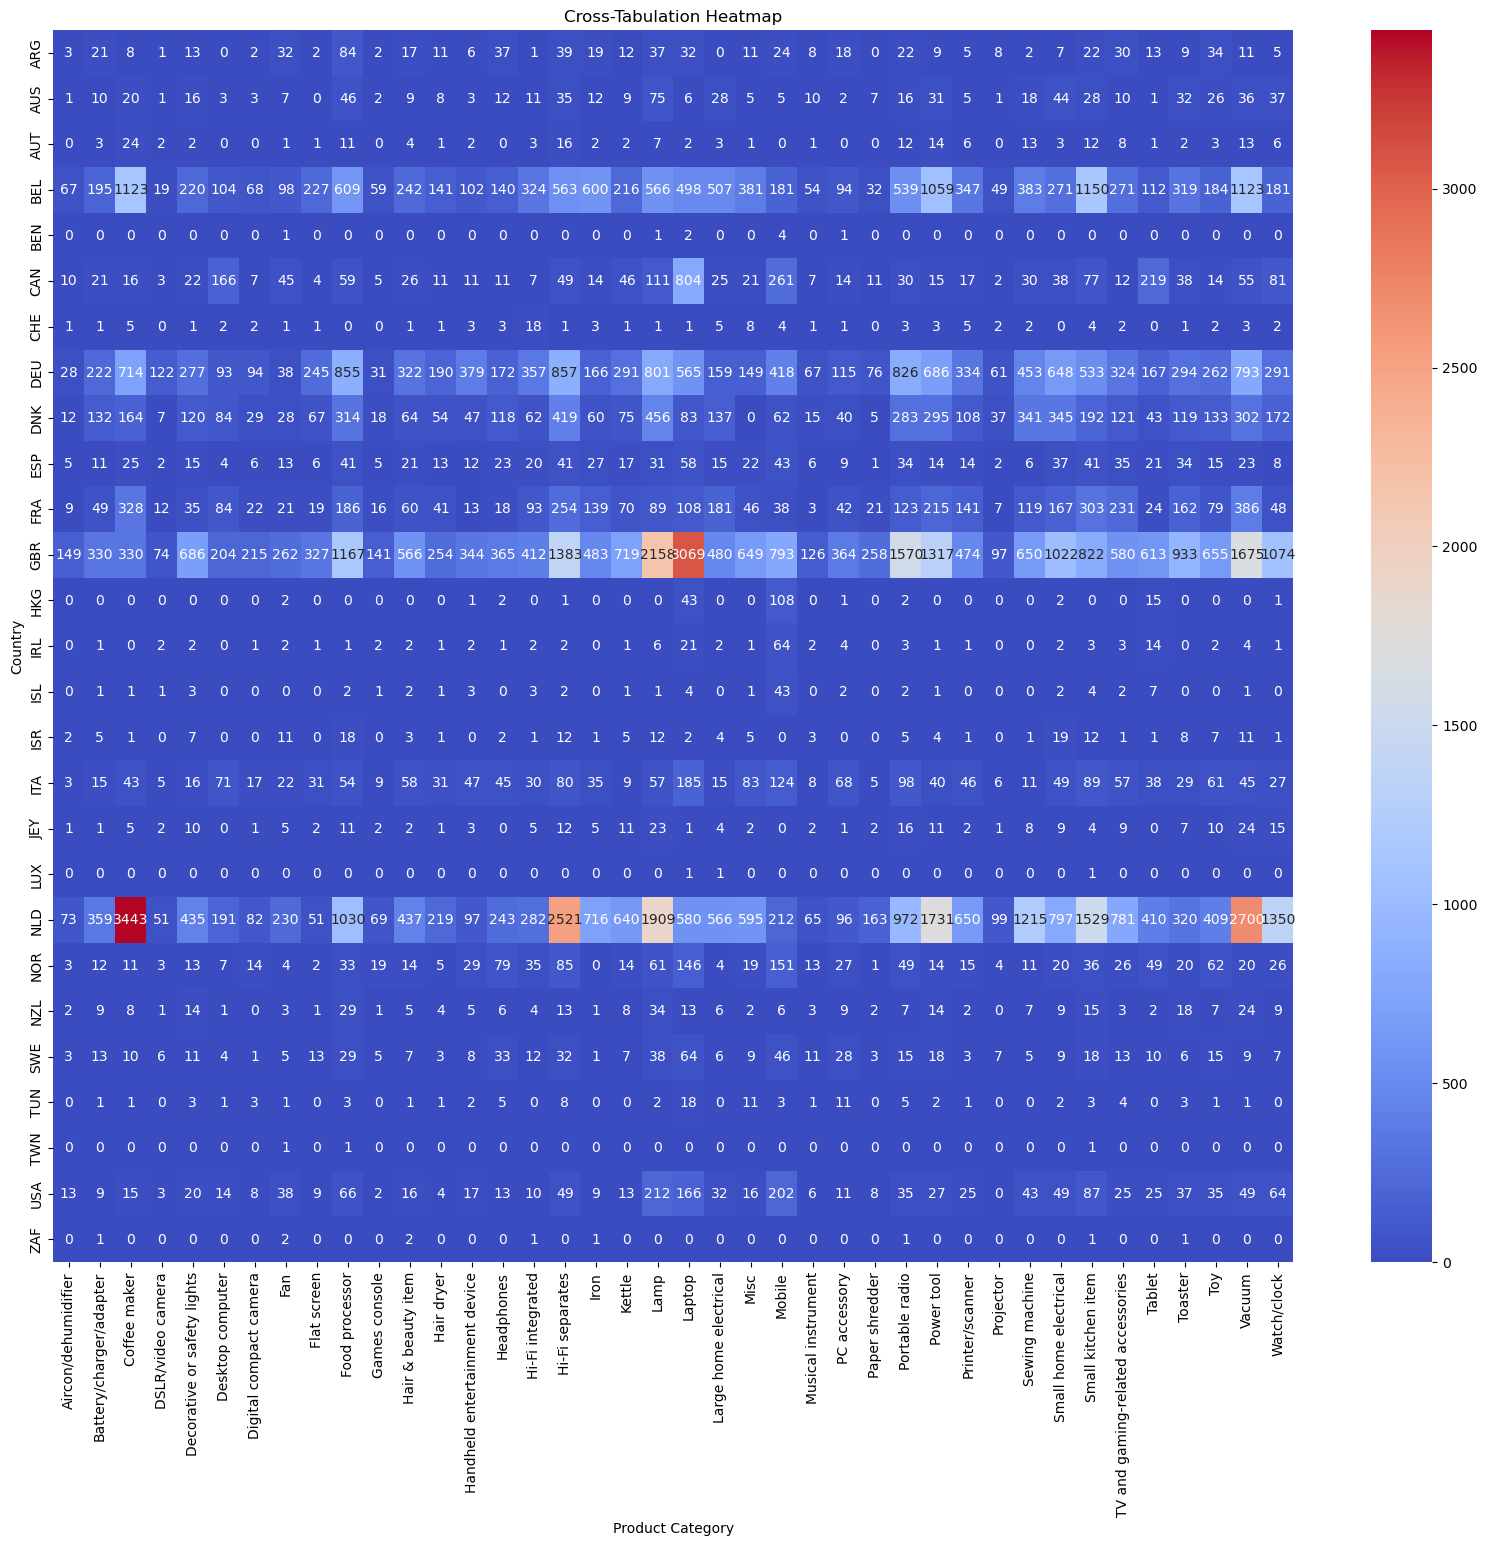

In [6]:
cross_tab = pd.crosstab(df['country'], df['product_category'])

# Create a heatmap using Seaborn
plt.figure(figsize=(20, 16))  # Adjust the figure size as needed
sns.heatmap(cross_tab, annot=True, fmt='d', cmap='coolwarm')

# Add labels and a title
plt.xlabel('Product Category')
plt.ylabel('Country')
plt.title('Cross-Tabulation Heatmap')

# Show the plot
plt.show()

quick look at the target variable - 'repair_status'

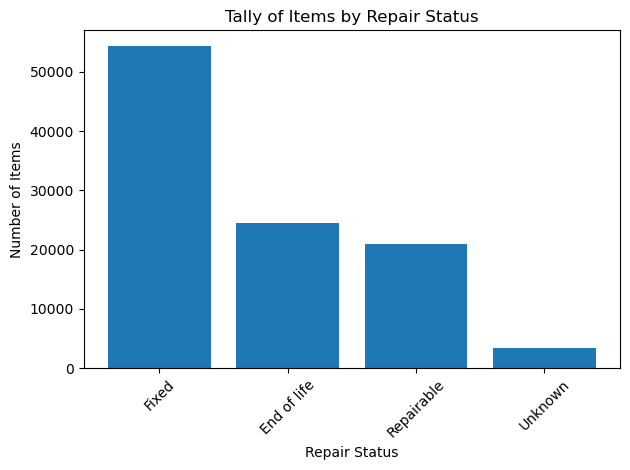

In [ ]:
value_counts = df['repair_status'].value_counts()

plt.bar(value_counts.index, value_counts.values)
plt.xlabel('Repair Status')
plt.ylabel('Number of Items')
plt.title('Tally of Items by Repair Status')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

We see that the majority of items in this dataset were able to be fixed, and a further 20% or so listed as "Repairable"
A combined less than 25% are "End of Life" (fix improbable or inadvisable) or "Unknown"

Pandas crosstab of Country vs Counts of Repair Status using pd.crosstab() followed by a stacked bar chart visualizing the data

repair_status  End of life  Fixed  Repairable  Unknown
country                                               
ARG                    141    465          11        0
AUS                    245    275         111        0
AUT                     42    109          26        4
BEL                   3000   7161        3154      103
BEN                      0      6           3        0
CAN                    459   1260         696        0
CHE                     15     47          33        0
DEU                   1983   7651        2379     1462
DNK                    797   3027         389      950
ESP                    158    393         223        2
FRA                   1243   1864         893        2
GBR                   6660  13253        7144      733
HKG                     12     56         110        0
IRL                     17     83          57        0
ISL                     20     31          40        0
ISR                     49     81          36        0
ITA       

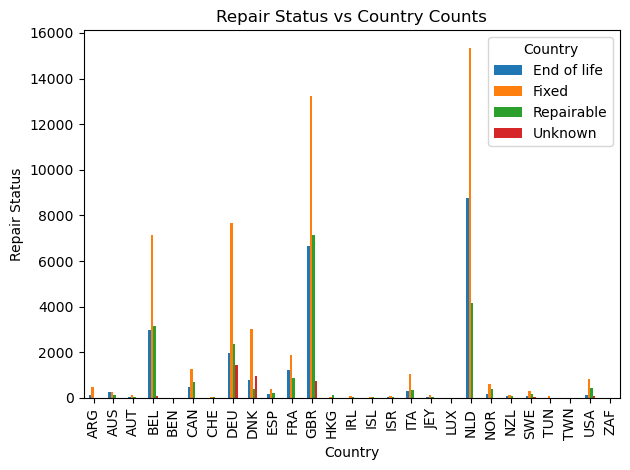

In [ ]:
qf = df.copy()

cross_tab = pd.crosstab(qf['country'], qf['repair_status'])
print(cross_tab)

cross_tab.plot(kind='bar')
plt.xlabel('Country')
plt.ylabel('Repair Status')
plt.title('Repair Status vs Country Counts')
plt.legend(title='Country')
plt.tight_layout()
plt.show()

Looks like items are able to be fixed far more often than not, irrespective of the country in which the attempt was made

In [25]:
cross_tab = pd.crosstab(qf['repair_status'], qf['brand'])
print(cross_tab)

brand          "Princess" fruitpers  (missed)  -  - onbekend  ....  /  1930s  \
repair_status                                                                  
End of life                       1         0  1           0     1  2      0   
Fixed                             0         1  3           0     0  0      0   
Repairable                        0         0  0           1     0  0      1   
Unknown                           0         0  0           0     0  0      0   

brand          1960's wooden table lamp  1960s misc  1byone  ...  zeppelin  \
repair_status                                                ...             
End of life                           0           0       1  ...         0   
Fixed                                 1           0       0  ...         0   
Repairable                            0           1       0  ...         1   
Unknown                               0           0       0  ...         0   

brand          zig zag  zigzag Deluxe Krëfel  zond

In [26]:
cross_tab = pd.crosstab(qf['repair_status'], qf['product_age'])
print(cross_tab)

product_age    0.0    0.1    0.2    0.3    0.4    0.5    0.6    0.7    0.8    \
repair_status                                                                  
End of life       63      1      1      1      0     25      0      1      0   
Fixed            121      2      3      7      1     88      0      0      3   
Repairable        32      2      5      1      0     43      2      0      3   
Unknown            5      0      0      0      0      1      0      0      0   

product_age    0.9    ...  92.0   93.0   95.0   97.0   98.0   99.0   100.0  \
repair_status         ...                                                    
End of life        0  ...      1      1      0      0      1      3      3   
Fixed              1  ...      6      6      0      1      6      9     13   
Repairable         0  ...      5      0      1      0      1      1      6   
Unknown            0  ...      0      0      0      0      0      0      1   

product_age    101.0  102.0  103.0  
repair_status

repair_status                      End of life     Fixed  Repairable   Unknown
product_category                                                              
Sewing machine                        0.115732  0.695298    0.154611  0.034358
Lamp                                  0.116926  0.692584    0.171053  0.019438
Hair dryer                            0.237952  0.653614    0.071285  0.037149
Paper shredder                        0.287395  0.623529    0.070588  0.018487
Decorative or safety lights           0.197321  0.614116    0.165894  0.022669
Watch/clock                           0.214328  0.594833    0.167352  0.023488
Toy                                   0.196429  0.593254    0.177083  0.033234
Musical instrument                    0.143204  0.582524    0.257282  0.016990
Vacuum                                0.213738  0.581828    0.179256  0.025178
Headphones                            0.194277  0.573795    0.200301  0.031627
Battery/charger/adapter               0.270042  0.54

<Figure size 2000x1600 with 0 Axes>

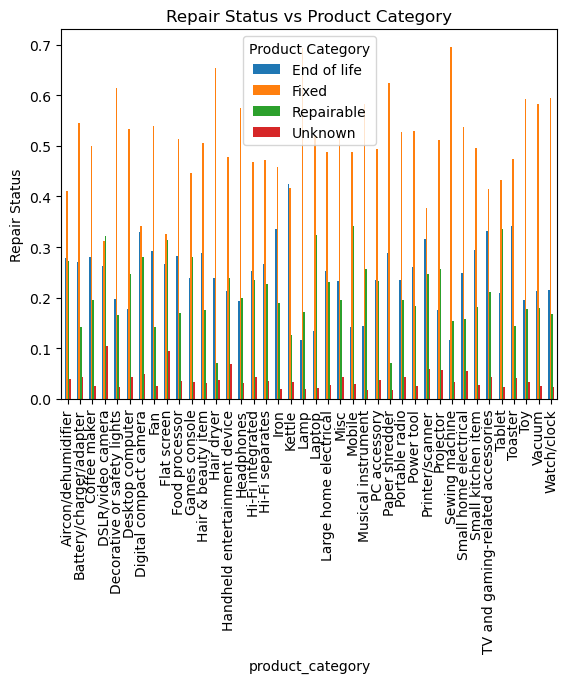

In [7]:
qf = df.copy()

cross_tab = pd.crosstab(qf['product_category'], qf['repair_status'], normalize='index')
cross_tab_sorted = cross_tab.sort_values(by='Fixed', ascending=False)
print(cross_tab_sorted)


plt.figure(figsize=(20, 16))
cross_tab.plot(kind='bar')
plt.xlabel('product_category')
plt.ylabel('Repair Status')
plt.title('Repair Status vs Product Category')
plt.legend(title='Product Category')
plt.show()

Very promising results! Right away we can see that the top 5 categories in terms of repairability success rate are all above 60% in the "fixed" status alone, not even including the additional opportunities identified by the 'repairable' column.

While the bottom 4 product categories have a success rate of under 40% (but never lower than 30%), and about half the dataset has a success rate between 40 and 50%, the combined Fixed + Repairable count is never under 50% for any of the product categories. 

## Correlation Heatmap {#correlation-heatmap}

## Translate Attempts {#translate-attempts}

In [28]:
# EasyNMT translation library
from easynmt import EasyNMT
model = EasyNMT("opus-mt")

df["problem"] = df.apply(lambda row: model.translate(row["problem"], target_lang="en"), axis=1)

ModuleNotFoundError: No module named 'easynmt'

In [ ]:
# trying to isolate language by country
df_en = df[df['country']=='GBR']
df_en

In [ ]:
#trying to isolate language by country
df_g = df[df['country']=='DEU']
df_g

In [ ]:
# attempting to use google translation library
df_g["problem"] = df_g.apply(lambda row: model.translate(row["problem"], target_lang="en"), axis=1)

In [ ]:
# dropping null values to provide cleaner data to the translator
df_g = df_g.dropna()
df_g

In [ ]:
# trying to use google translator library instead
import googletrans    
from googletrans import Translator


translator = Translator()
df_g['translated'] = df_g['problem'].apply(lambda x: translator.translate(x, dest='en').text)


In [ ]:
# trying to use google translator library
df_g["problem"] = df.apply(lambda row: model.translate(row["problem"], target_lang="en"), axis=1)

In [ ]:
import googletrans
from googletrans import Translator

In [ ]:
#backtracking to check functionality at a more basic level - code source: StackOverflow
translator = Translator()
langdict = {0: {'English': 'Hello', 'Japanese': 'こんにちは'}, 1: {'English': 'Thanks', 'Japanese': 'ありがとう'}}
df = pd.DataFrame(langdict).T
df['TranslatedText'] = df['Japanese'].apply(lambda x: translator.translate(x, src='auto', dest='en').text )
print(df)

In [ ]:
#attempting a different google translate library
pip install google_trans_new

In [ ]:
#attempting a different google translate library
from google_trans_new import google_translator

In [ ]:
#attempting a different google translate library
translator = google_translator()  
translate_text = translator.translate('Hola mundo!', lang_src='es', lang_tgt='en')  
print(translate_text)

In [ ]:
#attempting yet another translate library
pip install -U deep-translator

In [ ]:
#attempting yet another translate library
from deep_translator import GoogleTranslator
df['TranslatedText'] = df_g['problem'].apply(lambda x: GoogleTranslator.translate(x, src='auto', target='en').text)


So far, every translation library has errored out. But I'm making progress and will continue to sort out the 'problem' column to gain more insights

## Scratchpad?? {#scratchpad??}

In [ ]:
pip install kmodes

In [ ]:
from kmodes.kmodes import KModes
from scipy.stats import mode

In [ ]:
kmdf = pd.read_csv('Data/OpenRepairData_v0.3_aggregate_202303.csv')

In [ ]:
data = kmdf[['repair_status', 'brand' , 'product_category']]

In [ ]:
data = data.fillna(0)
data.isnull().sum()

repair_status       0
brand               0
product_category    0
dtype: int64

In [ ]:
data.to_numpy()

array([['End of life', 'Krups', 'Coffee maker'],
       ['Repairable', 'JBL', 'Hi-Fi integrated'],
       ['Fixed', 'Trust', 'Hi-Fi separates'],
       ...,
       ['Fixed', 'Toyota', 'Sewing machine'],
       ['Fixed', 'Brother', 'Sewing machine'],
       ['Fixed', 'Hoover', 'Vacuum']], dtype=object)

In [ ]:
km = KModes(n_clusters=4, init='Huang', n_init=5, verbose=1)

clusters = km.fit_predict(data)

# Print the cluster centroids
print(km.cluster_centroids_)

NameError: name 'KModes' is not defined

.to_numpy() convert to numpy array

In [ ]:
# Elbow curve to find optimal K
'''cost = []
K = range(1,5)
for num_clusters in list(K):
    kmode = KModes(n_clusters=num_clusters, init = "random", n_init = 5, verbose=1)
    kmode.fit_predict(data)
    cost.append(kmode.cost_)
    
plt.plot(K, cost, 'bx-')
plt.xlabel('No. of clusters')
plt.ylabel('Cost')
plt.title('Elbow Method For Optimal k')
plt.show()'''



In [ ]:
X = X[X.columns[~X.columns.isin(['repair_status'])]]
X

,product_category_Battery/charger/adapter,product_category_Coffee maker,product_category_DSLR/video camera,product_category_Decorative or safety lights,product_category_Desktop computer,product_category_Digital compact camera,product_category_Fan,product_category_Flat screen,product_category_Food processor,product_category_Games console,...,brand_zanussi,brand_zanussi combi oven,brand_zennoer,brand_zigzag Deluxe Krëfel,brand_zonder,brand_zoom,brand_à feuilles,brand_à main,brand_ældre model,brand_國騰
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103068,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
103071,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
103073,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
103074,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df2 = pd.read_csv('Data/OpenRepairData_v0.3_aggregate_202303.csv')

In [ ]:
df_quickclean = df2.dropna()

In [ ]:

X = df_quickclean['product_category_id'] # Only use the first two features so we can visualize
y = df_quickclean['repair_status']

#Plot
plt.scatter(X[y==1, 0], X[y==1, 1], s=20, c="yellow", label="Fixed")
plt.scatter(X[y==0, 0], X[y==0, 1], s=20, c="purple", label="Not fixed")
plt.legend()
plt.show()

KeyError: 'key of type tuple not found and not a MultiIndex'

In [ ]:
df_quickclean

# count vectorize NLP
# pd crosstab
# distribution visualizations
# logistic regression modeling
# more markdown



In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

#fill in na with unknown
X = df_quickclean[['product_category','country','product_age','brand']]
y = df_quickclean['repair_status']

X_encoded = pd.get_dummies(X)

X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.25, random_state=12)

tree_model = DecisionTreeClassifier(random_state=12)

tree_model.fit(X_train, y_train)

y_pred = tree_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")


In [ ]:
#from sklearn.metrics import accuracy_score, confusion_matrix
# Create confusion matrix
#confusion = confusion_matrix(y_test, y_pred)

# Create a heatmap using Seaborn
#plt.figure(figsize=(8, 6))
#sns.heatmap(confusion, annot=True, fmt="d", cmap="Blues",
           # xticklabels=tree_model.classes_,
           # yticklabels=tree_model.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
import pandas as pd
from sklearn.preprocessing import MultiLabelBinarizer


df_quickclean['problem_tokens'] = df_quickclean['problem'].str.split()

mlb = MultiLabelBinarizer()


onehot_encoded_words = mlb.fit_transform(df_quickclean['problem_tokens'])


onehot_encoded_df = pd.DataFrame(onehot_encoded_words, columns=mlb.classes_)


df_encoded = pd.concat([df_quickclean, onehot_encoded_df], axis=1)

df_encoded.drop(['problem', 'problem_tokens'], axis=1, inplace=True)

In [ ]:
df_encoded

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Assuming you have your DataFrame 'df_encoded' and 'repair_status' column

target_column = 'repair_status'
columns_to_exclude = [target_column]  # Add any columns you want to exclude from modeling

for column in df_encoded.columns:
    if column not in columns_to_exclude:
        X = df_encoded[[column]]  # Select the current column as the feature
        y = df_encoded[target_column]  # Target variable

        X_encoded = pd.get_dummies(X)  # One-hot encode categorical variables if needed

        X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.25, random_state=12)

        tree_model = DecisionTreeClassifier(random_state=12)
        tree_model.fit(X_train, y_train)
        y_pred = tree_model.predict(X_test)

        accuracy = accuracy_score(y_test, y_pred)
        print(f"Accuracy for column '{column}': {accuracy:.2f}")


In [ ]:
X = df_encoded['']
y = df_encoded['repair_status']

X_encoded = pd.get_dummies(X)

X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.25, random_state=12)

tree_model = DecisionTreeClassifier(random_state=12)

tree_model.fit(X_train, y_train)

y_pred = tree_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [ ]:
k=2

kmeans = KMeans(n_clusters = k)
kmeans.fit(df_quickclean)
labels = kmeans.predict(df_quickclean)

inertia = kmeans.inertia_
sil_score = silhouette_score(df_quickclean, labels)

In [ ]:
conda install XLMRobertaTokenizer from transformers

In [ ]:
import pandas as pd
from transformers import XLMRobertaTokenizer

# Load the XLM-R tokenizer
tokenizer = XLMRobertaTokenizer.from_pretrained("xlm-roberta-base")

# Create a sample DataFrame
data = {
    "description": [
        "Hello, how are you?",
        "Bonjour, comment ça va ?",
        "Hola, ¿cómo estás?",
        "Ciao, come stai?"
    ]
}
df = pd.DataFrame(data)

# Tokenize the descriptions in the DataFrame
tokenized_descriptions = []

for description in df["description"]:
    tokens = tokenizer.tokenize(description)
    tokenized_descriptions.append(tokens)

df["tokenized_description"] = tokenized_descriptions

print(df)
## In this example, the tokenizer.tokenize method is applied to each description in the "description" column of the DataFrame. The resulting tokenized sequences are stored in a new column called "tokenized_description."

## Keep in mind that tokenizing large amounts of text can be time-consuming. If you have a large DataFrame, you might want to consider using parallel processing or batching the tokenization process for better performance.







In [ ]:
import pandas as pd
from transformers import XLMRobertaTokenizer

# Load the XLM-R tokenizer
tokenizer = XLMRobertaTokenizer.from_pretrained("xlm-roberta-base")

# Create a sample DataFrame
data = {
    "description": [
        "Hello, how are you?",
        "Bonjour, comment ça va ?",
        "Hola, ¿cómo estás?",
        "Ciao, come stai?"
    ]
}
df = pd.DataFrame(data)

# Tokenize individual words in the descriptions
tokenized_word_lists = []

for description in df["description"]:
    words = description.split()  # Split text into words
    tokens = [tokenizer.tokenize(word) for word in words]
    tokenized_word_lists.append(tokens)

df["tokenized_words"] = tokenized_word_lists

print(df)
# In this version of the code, the description text is split into individual words using the split() method. Then, the XLM-R tokenizer is applied to each word separately, resulting in tokenized sequences for individual words. The tokenized word sequences are stored in a new column called "tokenized_words."

# Please note that this approach tokenizes words within the text, and words are often broken down into subword tokens. If you want to preserve the original words while tokenizing, you might need to adapt the code accordingly.







In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

data = {
    "tokenized_words": [
        [["Eating"], ["a"], ["monster"], ["sandwich"]],
        [["Bonjour"], ["comment"], ["ça", "va", "?"]],
        [["Hola"], ["cómo"], ["estás", "?"]],
        [["Ciao"], ["come"], ["stai", "?"]]
    ],
    "target": [10, 20, 30, 40]  # Example target values
}
df = pd.DataFrame(data)

# Flatten tokenized words
df["flat_tokenized_words"] = df["tokenized_words"].apply(lambda x: [word for sublist in x for word in sublist])

# Convert tokenized words to text
df["text"] = df["flat_tokenized_words"].apply(lambda x: " ".join(x))

# Convert text to numerical features using CountVectorizer
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df["text"])

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, df["target"], test_size=0.2, random_state=42)

# Initialize and train a linear regression model
reg_model = LinearRegression()
reg_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = reg_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

In [ ]:
label_encoders = {}
for col in df["Product_Category", "Age", "Country"]:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Split data into features and target
X = df.drop("F", axis=1)
y = df["F"]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and fit the decision tree model
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

to do: grid search, gradient boost, cross-validation

## Decision Tree {#decision-tree}

In [ ]:
#df = pd.read_csv("data/OpenRepairData_v0.3_aggregate_202303.csv")

In [8]:
dtdf = dfc[['repair_status', 'product_category', 'country','brand']]
#dtdf = dfc[['repair_status', 'product_category', 'country']]

In [9]:
dtdf = dtdf.drop(dtdf[dtdf['repair_status'] == 'Unknown'].index)
dtdf['repair_status']

0         End of life
1          Repairable
2               Fixed
3         End of life
4         End of life
             ...     
103071          Fixed
103072     Repairable
103073          Fixed
103074          Fixed
103075          Fixed
Name: repair_status, Length: 99676, dtype: object

In [10]:
dtdf = dtdf.drop(dtdf[dtdf['repair_status'] == 'Repairable'].index)
dtdf['repair_status']

0         End of life
2               Fixed
3         End of life
4         End of life
5         End of life
             ...     
103068    End of life
103071          Fixed
103073          Fixed
103074          Fixed
103075          Fixed
Name: repair_status, Length: 78728, dtype: object

In [11]:
repair_dataset = dtdf
print(repair_dataset["repair_status"].value_counts())


repair_status
Fixed          54295
End of life    24433
Name: count, dtype: int64


<Axes: xlabel='repair_status'>

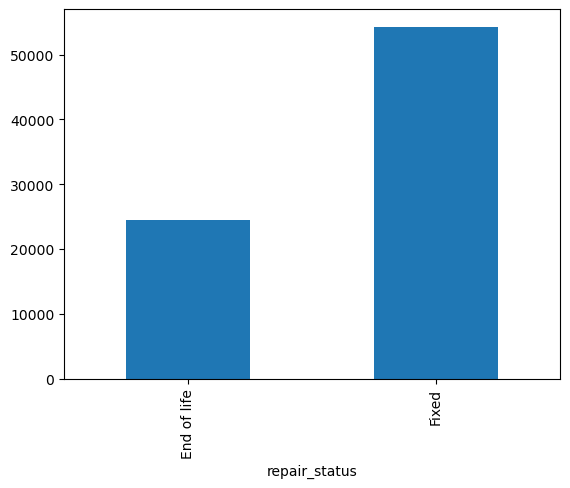

In [44]:
repair_dataset.groupby('repair_status').size().plot(kind='bar',
                                       y = "v1",
                                       label = "Type"
                                       )

In [12]:
fixed = repair_dataset[repair_dataset["repair_status"] == "Fixed"]
EOL  = repair_dataset[repair_dataset["repair_status"] == "End of life"]
print(fixed.shape)
print(EOL.shape)

(54295, 4)
(24433, 4)


# https://wellsr.com/python/upsampling-and-downsampling-imbalanced-data-in-python/
# https://machinelearningmastery.com/smote-oversampling-for-imbalanced-classification/

In [13]:
from sklearn.utils import resample
fixed_downsample = resample(fixed,
             replace=True,
             n_samples=len(EOL),
             random_state=42)

print(fixed_downsample.shape)

(24433, 4)


repair_status
Fixed          24433
End of life    24433
Name: count, dtype: int64


<Axes: ylabel='Type'>

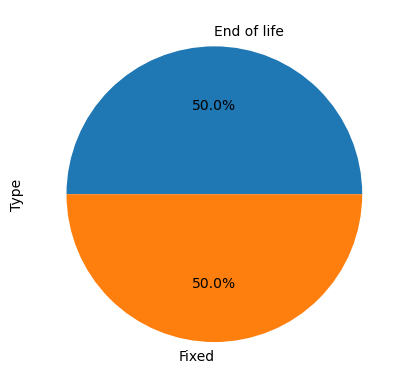

In [14]:
data_downsampled = pd.concat([fixed_downsample, EOL])

print(data_downsampled["repair_status"].value_counts())

data_downsampled.groupby('repair_status').size().plot(kind='pie',
                                       y = "v1",
                                       label = "Type",
                                       autopct='%1.1f%%')

In [15]:
dtdf = data_downsampled

In [16]:
label_encoder = LabelEncoder()
y = dtdf['repair_status']
y

NameError: name 'LabelEncoder' is not defined

In [17]:
dtdf[['product_category','country','brand']]

,product_category,country,brand
29637,Hi-Fi separates,NLD,Denon
1511,Portable radio,DEU,Kenwood
72674,Portable radio,GBR,Unknown
84936,Food processor,FRA,Kenwood
21077,Power tool,GBR,Unknown
...,...,...,...
103054,TV and gaming-related accessories,GBR,Panasonic
103062,Hair & beauty item,GBR,Gts
103065,Small home electrical,GBR,Dreamland
103067,Lamp,GBR,Solar light


In [18]:
clf = DecisionTreeClassifier(random_state=1234)
model = clf.fit(X, y)

NameError: name 'DecisionTreeClassifier' is not defined

In [19]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

label_encoder = LabelEncoder()
dtdf['repair_status_encoded'] = label_encoder.fit_transform(dtdf['repair_status'])

# Use one-hot encoding for 'country' and 'product_category'
data_encoded = pd.get_dummies(dtdf, columns=['product_category','country','brand'], drop_first=True)
# data_encoded = pd.get_dummies(dtdf, columns=['product_category','country'], drop_first=True)

# Separate features and target variable
X = data_encoded.drop('repair_status_encoded', axis=1)
y = data_encoded['repair_status_encoded']

In [20]:
X = X[X.columns[~X.columns.isin(['repair_status'])]]
X

,product_category_Battery/charger/adapter,product_category_Coffee maker,product_category_DSLR/video camera,product_category_Decorative or safety lights,product_category_Desktop computer,product_category_Digital compact camera,product_category_Fan,product_category_Flat screen,product_category_Food processor,product_category_Games console,...,brand_workzone,brand_wurlitzer,brand_wurth,brand_xantlite,brand_xbox,brand_xiaomi,brand_zanussi,brand_zennoer,brand_zigzag Deluxe Krëfel,brand_ældre model
29637,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1511,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
72674,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
84936,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
21077,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103054,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
103062,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
103065,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
103067,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [21]:
y

29637     1
1511      1
72674     1
84936     1
21077     1
         ..
103054    0
103062    0
103065    0
103067    0
103068    0
Name: repair_status_encoded, Length: 48866, dtype: int32

## modeling results {"Modeling Results"}

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [23]:
from xgboost import XGBClassifier

In [24]:
#https://stackoverflow.com/questions/48645846/pythons-xgoost-valueerrorfeature-names-may-not-contain-or
import re
regex = re.compile(r"\[|\]|<", re.IGNORECASE)
X.columns = [regex.sub("_", col) if any(x in str(col) for x in set(('[', ']', '<'))) else col for col in X.columns.values]


In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)

# Create and fit the decision tree model
from xgboost import XGBClassifier

clf = XGBClassifier()
#clf = DecisionTreeClassifier(random_state=69)
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.6159197871905054


In [73]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import StratifiedKFold
from xgboost import XGBClassifier
from datetime import datetime

In [66]:
#timer function - https://www.kaggle.com/code/tilii7/hyperparameter-grid-search-with-xgboost
def timer(start_time=None):
    if not start_time:
        start_time = datetime.now()
        return start_time
    elif start_time:
        thour, temp_sec = divmod((datetime.now() - start_time).total_seconds(), 3600)
        tmin, tsec = divmod(temp_sec, 60)
        print('\n Time taken: %i hours %i minutes and %s seconds.' % (thour, tmin, round(tsec, 2)))

In [67]:
params = {
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5]
        }

In [68]:
xgb = XGBClassifier(learning_rate=0.02, n_estimators=600, objective='binary:logistic',
                    silent=True, nthread=1)

In [ ]:
folds = 1
param_comb = 2

skf = StratifiedKFold(n_splits=folds, shuffle = True, random_state = 1001)

random_search = RandomizedSearchCV(xgb, param_distributions=params, n_iter=param_comb, scoring='roc_auc', n_jobs=4, cv=skf.split(X,y), verbose=3, random_state=1001 )

# Here we go
start_time = timer(None) # timing starts from this point for "start_time" variable
random_search.fit(X, y)
timer(start_time) # timing ends here for "start_time" variable

Fitting 3 folds for each of 5 candidates, totalling 15 fits


In [ ]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()
classifier.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
y_pred = classifier.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[3192 1755]
 [2032 2795]]
              precision    recall  f1-score   support

           0       0.61      0.65      0.63      4947
           1       0.61      0.58      0.60      4827

    accuracy                           0.61      9774
   macro avg       0.61      0.61      0.61      9774
weighted avg       0.61      0.61      0.61      9774



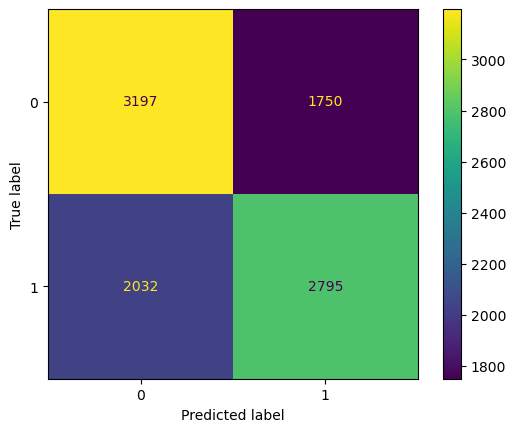

In [ ]:
y_pred = clf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm).plot()

In [ ]:
#pip install graphviz


     ---------------------------------------- 0.0/47.0 kB ? eta -:--:--
     -------- ------------------------------- 10.2/47.0 kB ? eta -:--:--
     ---------------- --------------------- 20.5/47.0 kB 217.9 kB/s eta 0:00:01
     --------------------------------- ---- 41.0/47.0 kB 245.8 kB/s eta 0:00:01
     -------------------------------------- 47.0/47.0 kB 261.0 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [ ]:
from sklearn import tree

In [ ]:
clf = DecisionTreeClassifier(random_state=1234)
model = clf.fit(X, y)

In [ ]:
text_representation = tree.export_text(clf)
print(text_representation)

|--- feature_0 <= -5.29
|   |--- class: 1
|--- feature_0 >  -5.29
|   |--- class: 0



In [ ]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(clf, 
                   feature_names=X.feature_names,  
                   class_names=y.target_names,
                   filled=True)

AttributeError: 'numpy.ndarray' object has no attribute 'feature_names'

<Figure size 2500x2000 with 0 Axes>

In [ ]:
def PlotBoundaries(model, X, Y, dot_size=20, figsize=(10,7)) :
    '''
    Helper function that plots the decision boundaries of a model and data (X,Y)
    code modified from: https://scikit-learn.org/stable/auto_examples/neighbors/plot_classification.html
    '''
    
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1,X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=figsize)
    plt.contourf(xx, yy, Z, alpha=0.4)

    #Plot
    plt.scatter(X[:, 0], X[:, 1], c=Y, s=dot_size, edgecolor='k')
    plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# Fitting the linear model
LR_model = LogisticRegression()
LR_model.fit(X_train, y_train)

# Visualize its results
PlotBoundaries(LR_model, X_train, y_train) 

# Evaluate its classification accuracy (Just on the training set for now)
print(f"Train set accuracy: {LR_model.score(X_train, y_train)}")

c:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


InvalidIndexError: (slice(None, None, None), 0)

Error: c:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(

In [ ]:
LogisticRegression(solver='lbfgs', max_iter=1000000)

LogisticRegression(max_iter=1000000)

## Natural Langauge Processing {#NLP}

In [49]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer

Loading the dataset into a pandas dataframe with pd.read_csv()
then reducing it down to just the 'repair_status' and 'problem' columns

In [28]:
#ldf = pd.read_csv("data/OpenRepairData_v0.3_aggregate_202303.csv")
ldf = dfc
ldf = ldf[['repair_status', 'problem']]
ldf

,repair_status,problem
0,End of life,Pumpe defekt
1,Repairable,Akku lädt nicht
2,Fixed,Ohne Funktion
3,End of life,Netzteilbuchse und Grafikkarte defekt
4,End of life,Getriebeschaden
...,...,...
103071,Fixed,Extension cable for PAT testing.
103072,Repairable,Broken mirror.
103073,Fixed,Cotton reel spindle needs replacing.
103074,Fixed,Bobbin not working.


looking for total "na" values in 'repair_status' column with .isna().sum() - found 0

In [29]:
ldf['repair_status'].isna().sum()

0

looking for total "na" values in 'problem' column using .isna().sum() - found 15,045

In [30]:
ldf['problem'].isna().sum()

15046

replace all "Na" values with "blank"

In [31]:
ldf = ldf.fillna('blank')

use .drop to remove all rows with "Unknown" in the 'repair_status' column to simplify modeling
and check to see that it took effect

In [32]:
ldf = ldf.drop(ldf[ldf['repair_status'] == 'Unknown'].index)
ldf['repair_status']

0         End of life
1          Repairable
2               Fixed
3         End of life
4         End of life
             ...     
103071          Fixed
103072     Repairable
103073          Fixed
103074          Fixed
103075          Fixed
Name: repair_status, Length: 99676, dtype: object

use .drop to remove all rows with "Repairable" in the 'repair_status' column to simplify modeling
and check to see that it took effect

In [33]:
ldf = ldf.drop(ldf[ldf['repair_status'] == 'Repairable'].index)
ldf['repair_status']

0         End of life
2               Fixed
3         End of life
4         End of life
5         End of life
             ...     
103068    End of life
103071          Fixed
103073          Fixed
103074          Fixed
103075          Fixed
Name: repair_status, Length: 78728, dtype: object

use .loc to find all rows with "Fixed" in the 'repair_status' column

In [34]:
fixed_df = ldf.loc[ldf['repair_status'] == 'Fixed']
fixed_df

,repair_status,problem
2,Fixed,Ohne Funktion
10,Fixed,Softwareproblem
11,Fixed,Klappe klemmt
12,Fixed,ohne Funktion
13,Fixed,Schalter defekt
...,...,...
103063,Fixed,Dab radiodoesn't switch on.
103071,Fixed,Extension cable for PAT testing.
103073,Fixed,Cotton reel spindle needs replacing.
103074,Fixed,Bobbin not working.


choosing a random sample of 1000 rows to make processing faster

In [53]:
simple_data_f = fixed_df.sample(n=1000, random_state=1)
simple_data_f

,repair_status,problem
37832,Fixed,brandt nt peertje kapot alles doorgemeten en m...
29129,Fixed,DVD schijfje komt er niet uit - snaar snaar v...
36257,Fixed,Na half uurtje draaien komt er rook uit de mot...
14313,Fixed,needs to be put back together loose parts put ...
69024,Fixed,Broken Screen
...,...,...
39824,Fixed,kabelbreuk
52932,Fixed,Op toestel bevindt zich een schermpje(zie foto...
45527,Fixed,Hapert Filters vervuild Filters schoongemaakt
21943,Fixed,Not working Faulty battery


tokenizing the text data using str.split() to create lists of words from every sentence

In [52]:
simple_data_f['problem'].str.split(' ')

NameError: name 'simple_data_f' is not defined

In [50]:
from sklearn.feature_extraction.text import CountVectorizer

In [51]:
bagofwords = CountVectorizer()

bagofwords.fit(simple_data_f['problem'])

small_transformed = bagofwords.transform(simple_data_f['problem'])
small_transformed

NameError: name 'simple_data_f' is not defined

In [ ]:
bagofwords.get_feature_names_out()

array(['10', '100', '11', ..., 'überbrücken', 'überbrückt', 'überprüft'],
      dtype=object)

In [ ]:
small_transformed.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [ ]:
# add more features
# more markdown
# multiple models
# hyperparameter tuning
# if every model is named uniquely ... fformatting 
# upsampling / downsampling 


In [ ]:
df = pd.DataFrame(columns=bagofwords.get_feature_names_out(), data=small_transformed.toarray())
display(df)

,10,100,11,110gr,12,12v,145,146,17,2020,...,één,éénmaal,être,öffnen,ölen,ønstalleerd,über,überbrücken,überbrückt,überprüft
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
996,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## NLP ROUND 2

dividing the data between train and test sections using sklearn's train_test_split 

In [35]:
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt

In [36]:
#ndf = pd.read_csv("data/OpenRepairData_v0.3_aggregate_202303.csv")
ndf = dfc

In [37]:
ndf['country'].unique()

array(['DEU', 'AUT', 'AUS', 'BEL', 'CAN', 'CHE', 'ESP', 'FRA', 'GBR',
       'HKG', 'IRL', 'ISR', 'NLD', 'NZL', 'SWE', 'USA', 'ZAF', 'LUX',
       'NOR', 'ARG', 'ITA', 'ISL', 'JEY', 'TUN', 'BEN', 'DNK', 'TWN'],
      dtype=object)

using df.loc[] and .isin() to select only the rows where the country has English as its first language, in order to select only English entries

In [38]:
ndf = (df.loc[ndf['country'].isin(['GBR','CAN', 'AUS', 'NZL', 'IRL', 'USA'])])

In [39]:
ndf = ndf.drop(ndf[ndf['repair_status'] == 'Unknown'].index)
ndf = ndf.drop(ndf[ndf['repair_status'] == 'Repairable'].index)
ndf['repair_status']

12556           Fixed
12557           Fixed
12558     End of life
12559     End of life
12560     End of life
             ...     
103068    End of life
103071          Fixed
103073          Fixed
103074          Fixed
103075          Fixed
Name: repair_status, Length: 23437, dtype: object

In [40]:
ndf = ndf[['repair_status', 'problem']]
ndf

,repair_status,problem
12556,Fixed,Volume control not working. Dirty switches Cle...
12557,Fixed,Blades not turning. Probably motor temporarily...
12558,End of life,Unknown Possible broken belt
12559,End of life,Power short out Internal fault
12560,End of life,Won't grind Thermal fuse blown and motor seized
...,...,...
103068,End of life,Malfunction.
103071,Fixed,Extension cable for PAT testing.
103073,Fixed,Cotton reel spindle needs replacing.
103074,Fixed,Bobbin not working.


In [86]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

label_encoder = LabelEncoder()
ndf['repair_status_encoded'] = label_encoder.fit_transform(ndf['repair_status'])
ndf

,repair_status,problem,repair_status_encoded
12556,Fixed,Volume control not working. Dirty switches Cle...,1
12557,Fixed,Blades not turning. Probably motor temporarily...,1
12558,End of life,Unknown Possible broken belt,0
12559,End of life,Power short out Internal fault,0
12560,End of life,Won't grind Thermal fuse blown and motor seized,0
...,...,...,...
103068,End of life,Malfunction.,0
103071,Fixed,Extension cable for PAT testing.,1
103073,Fixed,Cotton reel spindle needs replacing.,1
103074,Fixed,Bobbin not working.,1


In [87]:
ndf = ndf.fillna('blank')

In [88]:
X = ndf['problem']
y = ndf['repair_status_encoded']

In [89]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [90]:
X_train.shape

(18749,)

In [91]:
y_train.shape

(18749,)

In [92]:
print(f"the shape of x_train is {X_train.shape}")

the shape of x_train is (18749,)


In [93]:
bagofwords = CountVectorizer()

bagofwords.fit (X_train)

X_train_transformed = bagofwords.transform(X_train)
X_train_transformed

<18749x7828 sparse matrix of type '<class 'numpy.int64'>'
	with 120866 stored elements in Compressed Sparse Row format>

In [94]:
words = bagofwords.get_feature_names_out()
some_indices = range(1, 7828, round(7828/10))

samples = [words[i] for i in some_indices]
print(samples)

['001', 'beauty', 'condemed', 'ebay', 'guled', 'liking', 'overwhelming', 'reform', 'smelling', 'tout']


In [95]:
counts = np.array(X_train_transformed[:, some_indices].sum(axis = 0))

display(pd.DataFrame({"total_corpus_count": counts[0]}, index=samples).T)

,001,beauty,condemed,ebay,guled,liking,overwhelming,reform,smelling,tout
total_corpus_count,1,1,2,7,1,1,1,1,2,3


In [96]:
len(bagofwords.get_feature_names_out())

7828

In [97]:
X_train_transformed.toarray().sum(axis=0)

array([1, 1, 1, ..., 9, 1, 1], dtype=int64)

bar graph of the Top 20 most frequently occurring words

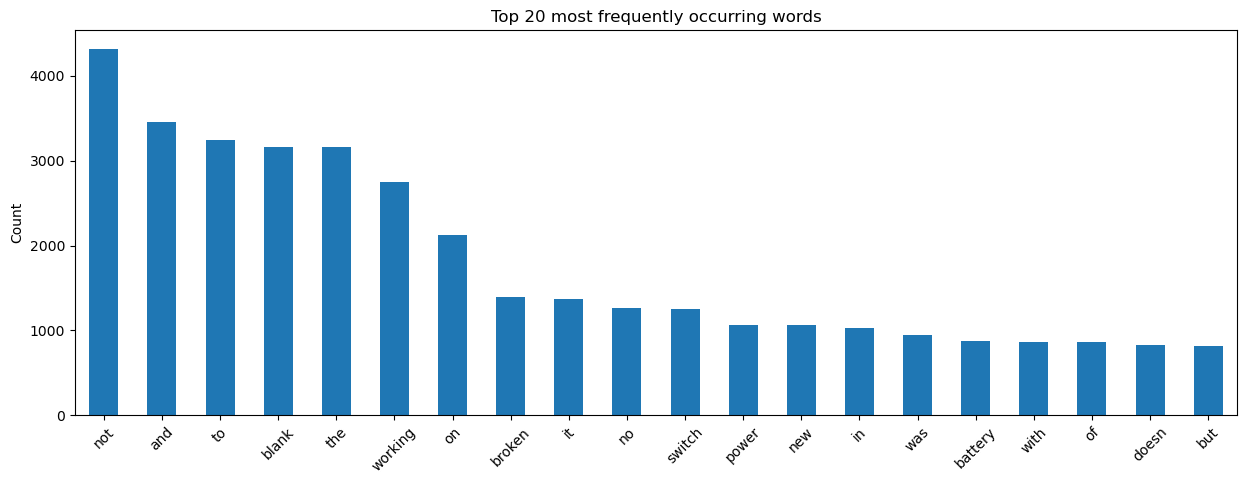

In [98]:
word_counts = pd.DataFrame(
    {"counts": X_train_transformed.toarray().sum(axis=0)},
    index=bagofwords.get_feature_names_out()
).sort_values("counts", ascending=False)

word_counts.head(20).plot(kind="bar", figsize=(15, 5), legend=False)
plt.title("Top 20 most frequently occurring words")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

removing English stop words

In [99]:
bagofwords = CountVectorizer(stop_words="english")
bagofwords.fit(X_train)

X_train_transformed = bagofwords.transform(X_train) 
X_test_transformed = bagofwords.transform(X_test) 

X_train_transformed.shape

(18749, 7579)

In [100]:
y_train.shape

(18749,)

bar graph of the Top 20 most frequently occurring words

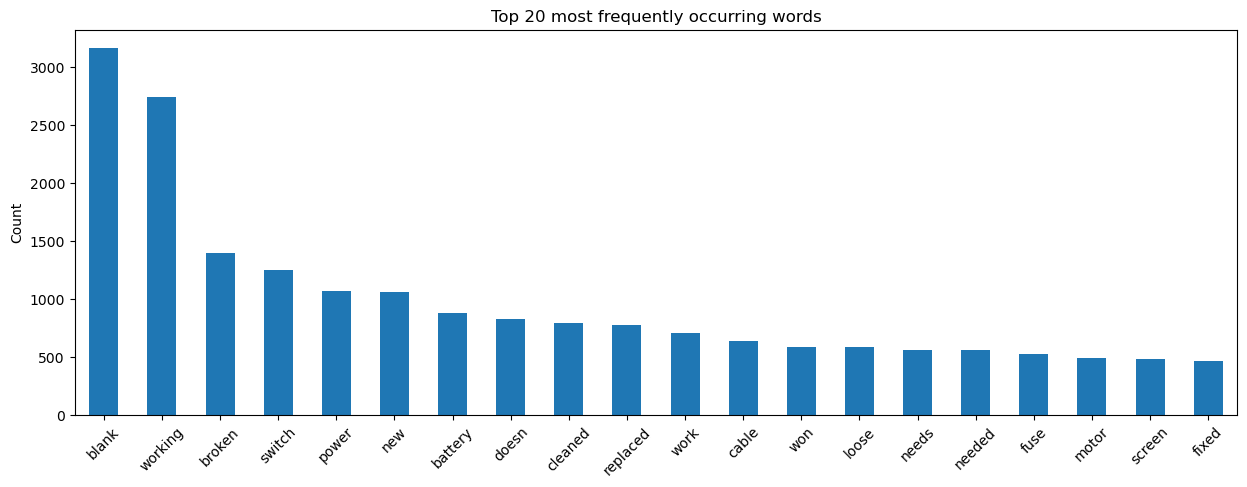

In [101]:
word_counts = pd.DataFrame(
    {"counts": X_train_transformed.toarray().sum(axis=0)},
    index=bagofwords.get_feature_names_out()
).sort_values("counts", ascending=False)

word_counts.head(20).plot(kind="bar", figsize=(15, 5), legend=False)
plt.title("Top 20 most frequently occurring words")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

In [102]:
X_test_transformed = bagofwords.transform(X_test)
X_test_transformed

<4688x7579 sparse matrix of type '<class 'numpy.int64'>'
	with 21465 stored elements in Compressed Sparse Row format>

In [103]:
words = bagofwords.get_feature_names_out()
some_indices = range(1, 7348, round(7348/100))

samples = [words[i] for i in some_indices]
print(samples)

['001', '2011', '50424', 'accidental', 'adult', 'allowed', 'aplification', 'assembeld', 'awful', 'b346', 'battry', 'binned', 'bobbon', 'breakage', 'bullhorn', 'calipers', 'casing', 'changed', 'chose', 'clockwork', 'come', 'confirmation', 'convenient', 'cr2031', 'curoded', 'dc34s', 'demo', 'diagnostic', 'discarded', 'documents', 'draining', 'démarre', 'electronic', 'eroding', 'explain', 'falled', 'figured', 'flames', 'fonction', 'frost', 'generating', 'graunching', 'halfords', 'heater', 'hood', 'idea', 'indication', 'insured', 'ironing', 'joystick', 'lacking', 'leakingiron', 'likely', 'looks', 'magnatron', 'mashed', 'mes', 'mission', 'mouth', 'netbook', 'nécessaire', 'operate', 'overhead', 'particular', 'percolator', 'pipe', 'pointed', 'powergeneral', 'problem', 'psi', 'rack', 'reasonable', 'recovery', 'regards', 'repaid', 'resetting', 'retuning', 'rocking', 'salter', 'screaming', 'send', 'sharpenig', 'shuttle', 'slips', 'solid', 'spectra', 'squirted', 'stickers', 'stripes', 'superled',

In [104]:
counts = np.array(X_train_transformed[:, some_indices].sum(axis = 0))
display(pd.DataFrame({"total_corpus_count": counts[0]}, index=samples).T)

,001,2011,50424,accidental,adult,allowed,aplification,assembeld,awful,b346,...,teenage,thinking,toasts,transit,turned,uneven,upright,versions,vpn,warmshurst
total_corpus_count,1,1,1,1,1,5,1,1,3,1,...,1,2,1,1,64,3,3,1,1,1


In [105]:
len(bagofwords.get_feature_names_out())

7579

In [106]:
X_train_transformed.toarray().sum(axis=0)

array([1, 1, 1, ..., 9, 1, 1], dtype=int64)

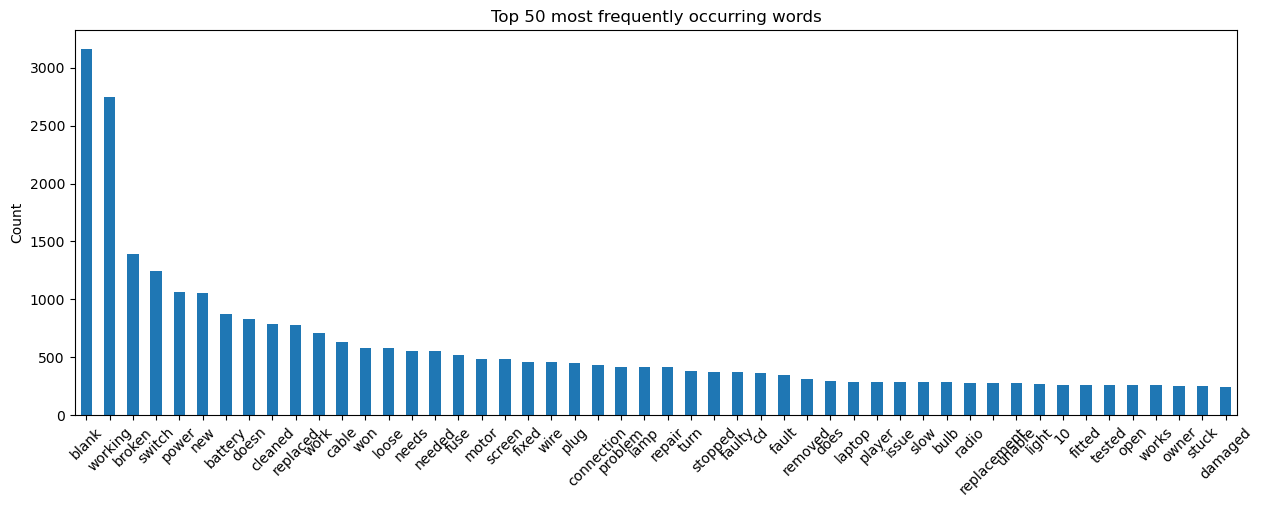

In [107]:
word_counts = pd.DataFrame(
    {"counts": X_train_transformed.toarray().sum(axis=0)},
    index=bagofwords.get_feature_names_out()
).sort_values("counts", ascending=False)

word_counts.head(50).plot(kind="bar", figsize=(15, 5), legend=False)
plt.title("Top 50 most frequently occurring words")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

In [109]:
# Fitting a model
logreg = LogisticRegression(C = 0.1)
logreg.fit(X_train_transformed, y_train)

# Training and test score
print(f"Train score: {logreg.score(X_train_transformed, y_train)}")
print(f"Test score: {logreg.score(X_test_transformed, y_test)}")

Train score: 0.7658008427116113
Test score: 0.7566126279863481


In [78]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

label_encoder = LabelEncoder()
dtdf['repair_status_encoded'] = label_encoder.fit_transform(dtdf['repair_status'])

In [ ]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

label_encoder = LabelEncoder()
dtdf['repair_status_encoded'] = label_encoder.fit_transform(dtdf['repair_status'])

# Use one-hot encoding for 'country' and 'product_category'
data_encoded = pd.get_dummies(dtdf, columns=['product_category','country','brand'], drop_first=True)
# data_encoded = pd.get_dummies(dtdf, columns=['product_category','country'], drop_first=True)

# Separate features and target variable
X = data_encoded.drop('repair_status_encoded', axis=1)
y = data_encoded['repair_status_encoded']

In [118]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [111]:
from xgboost import XGBClassifier

In [ ]:
#https://stackoverflow.com/questions/48645846/pythons-xgoost-valueerrorfeature-names-may-not-contain-or
import re
regex = re.compile(r"\[|\]|<", re.IGNORECASE)
X.columns = [regex.sub("_", col) if any(x in str(col) for x in set(('[', ']', '<'))) else col for col in X.columns.values]


In [116]:
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)

# Create and fit the decision tree model
from xgboost import XGBClassifier

clf = XGBClassifier()
#clf = DecisionTreeClassifier(random_state=69)
clf.fit(X_train_transformed, y_train)

print(f"Train score: {clf.score(X_train_transformed, y_train)}")
print(f"Test score: {clf.score(X_test_transformed, y_test)}")

Train score: 0.767400928049496
Test score: 0.7446672354948806


In [68]:
from sklearn.linear_model import LogisticRegression

In [121]:
from sklearn import classifier

ImportError: cannot import name 'classifier' from 'sklearn' (c:\Users\User\anaconda3\envs\tensorflow\Lib\site-packages\sklearn\__init__.py)

In [124]:
clf.fit(X_train_transformed, y_train)
y_pred = clf.predict(X_test_transformed)

In [119]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
#from sklearn.metrics import plot_confusion_matrix

In [125]:
confusion_matrix(y_test, y_pred)

array([[ 447, 1025],
       [ 172, 3044]], dtype=int64)

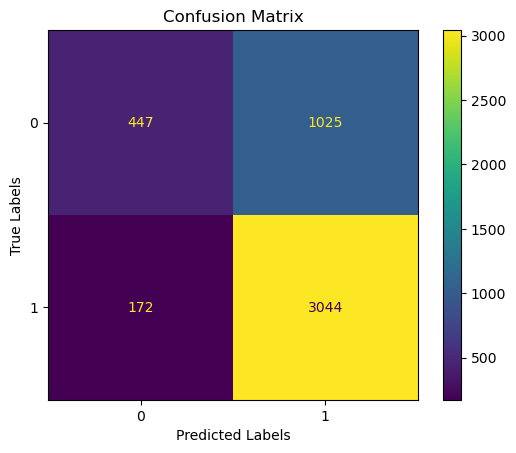

In [126]:
confusion_matrix_result = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_result)

disp.plot(cmap='viridis', values_format='d')

plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')

plt.show()

In [127]:
print(classification_report(y_test, y_pred))

NameError: name 'classification_report' is not defined

In [ ]:
logreg.coef_[0].shape

(7579,)

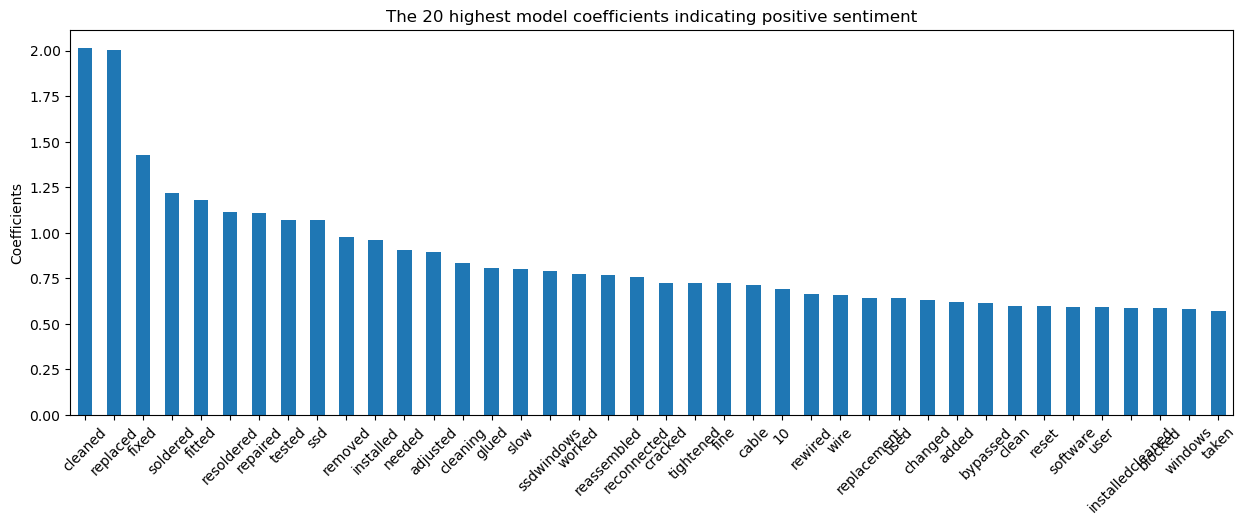

In [ ]:
word_counts = pd.DataFrame(
    {"coefficients": logreg.coef_[0]},
    index=bagofwords.get_feature_names_out()
).sort_values("coefficients", ascending=False)

word_counts.head(40).plot(kind="bar", figsize=(15, 5), legend=False)
plt.title("The 20 highest model coefficients indicating positive sentiment")
plt.ylabel("Coefficients")
plt.xticks(rotation=45)
plt.show()

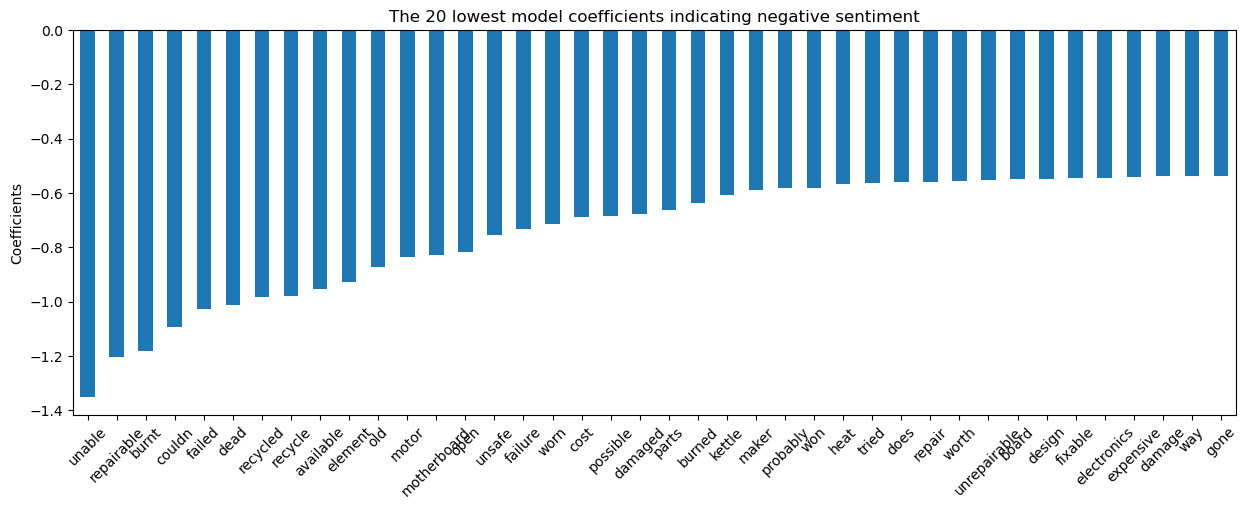

In [ ]:
word_counts.sort_values("coefficients", ascending=True).head(40).plot(kind="bar", figsize=(15, 5), legend=False)
plt.title("The 20 lowest model coefficients indicating negative sentiment")
plt.ylabel("Coefficients")
plt.xticks(rotation=45)
plt.show()

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC, LinearSVC

In [ ]:
# Instantiate models
knn = KNeighborsClassifier()
dt = DecisionTreeClassifier(max_depth=10)
svc = SVC(kernel='rbf')
linear_svc = LinearSVC()

# Fit models
knn.fit(X_train_transformed, y_train)
dt.fit(X_train_transformed, y_train)
svc.fit(X_train_transformed, y_train)
linear_svc.fit(X_train_transformed, y_train)

c:\Users\User\anaconda3\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


LinearSVC()

In [ ]:
print(f'KNN train: {knn.score(X_train_transformed, y_train)} KNN test:{knn.score(X_test_transformed, y_test)}')
print(f'DT train: {dt.score(X_train_transformed, y_train)} DT test:{dt.score(X_test_transformed, y_test)}')
print(f'SVM RBF train: {svc.score(X_train_transformed, y_train)} SVM RBF Test:{svc.score(X_test_transformed, y_test)}')
print(f'SVM linear train: {linear_svc.score(X_train_transformed, y_train)} SVM linear test: {linear_svc.score(X_test_transformed, y_test)}')

KNN train: 0.7641474211957971 KNN test:0.6828071672354948
DT train: 0.7061176596085125 DT test:0.7060580204778157
SVM RBF train: 0.8306042988959411 SVM RBF Test:0.7559726962457338
SVM linear train: 0.8363112699343965 SVM linear test: 0.748080204778157


In [ ]:
word_counts.head(40)

,coefficients
cleaned,2.012674
replaced,2.004584
fixed,1.429118
soldered,1.217847
fitted,1.178434
resoldered,1.113605
repaired,1.109919
tested,1.069636
ssd,1.069100
removed,0.974648


In [ ]:
y_train

64276           Fixed
83511     End of life
60300     End of life
60179           Fixed
23484     End of life
             ...     
72349           Fixed
100451          Fixed
55233           Fixed
13779           Fixed
80834     End of life
Name: repair_status, Length: 18749, dtype: object

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [ ]:

# example of training a final classification model
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_blobs
# generate 2d classification dataset
X, y = make_blobs(n_samples=100, centers=2, n_features=2, random_state=1)
# fit final model
model = LogisticRegression()
model.fit(X, y)

LogisticRegression()

In [128]:
y_pred = classifier.predict(X_test_transformed)

NameError: name 'classifier' is not defined

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

ValueError: Found input variables with inconsistent numbers of samples: [4688, 9774]

In [ ]:
y_pred = clf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm).plot()

ValueError: could not convert string to float: 'Not working'